In [172]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import rcParams

### Setting figure aesthetics 

In [173]:
rc = {'axes.axisbelow': True,
     'axes.edgecolor': '0.15',
     'axes.facecolor': 'white',
     'axes.grid': True,
     'axes.labelcolor': '.15',
     'axes.spines.bottom': True,
     'axes.spines.left': True,
     'axes.spines.right': False,
     'axes.spines.top': False,
     'figure.facecolor': 'white',
     'font.family': ['sans-serif'],
     'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],
     'grid.color': '.8',
     'grid.linestyle': '--',
     'image.cmap': 'rocket',
     'lines.solid_capstyle': 'round',
     'patch.edgecolor': 'w',
     'patch.force_edgecolor': True,
     'text.color': '.25',
     'xtick.bottom': False,
     'xtick.color': '.15',
     'xtick.direction': 'out',
     'xtick.top': False,
     'ytick.color': '.15',
     'ytick.direction': 'out',
     'ytick.left': False,
     'ytick.right': False}

sns.set_context("paper", font_scale=1.2)
sns.set_palette('deep')
sns.set_style("whitegrid", rc=rc)

In [174]:
# model labels
labels = ['ESABASE', 'SDT', 'CF', 'SHLD', 'SHLD_LIN']

## Comparison N. 1 

In [175]:
# defining the dataframes
columns=['ni_ext', 'ni', 'np', 'pnp', 'npc', 'np_ni', 'np_ni_ext']
data = np.array([[133.2, 117.26, 117.26, 117.26, 117.26],  # external impacts
        [21.38, 18.76, 18.76, 18.76, 18.76],  # internal impacts
        [3.60E-03, 6.24E-03, 6.24E-03, 1.41E-03, 4.42E-03],  # penetrations
        [0.9964, 0.9938, 0.9938, 0.9986, 0.9956],  # PNP
        [0.0036, 0.0062, 0.0062, 0.0014, 0.0044],  # corrected penetrations
        [1.68E-04, 3.32E-04, 3.32E-04, 7.51E-05, 2.36E-04],  # Np / Ni
        [2.70E-05, 5.32E-05, 5.32E-05, 1.20E-05, 3.77E-05]])  # Np / Ni_ext
df1 = pd.DataFrame(data=data, columns=['ESABASE', 'SDT', 'CF', 'SHLD', 'SHLD_LIN'])
df2 = pd.DataFrame(data=data.T, columns=columns)

ni_ext


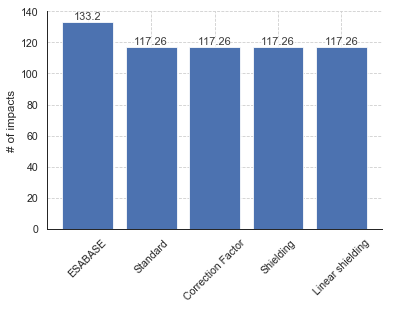

ni


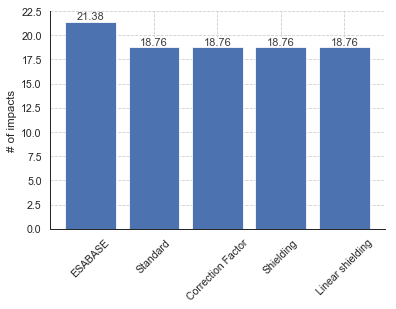

np


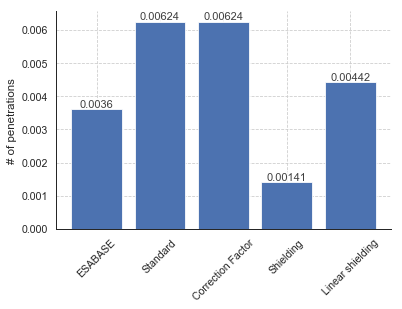

pnp


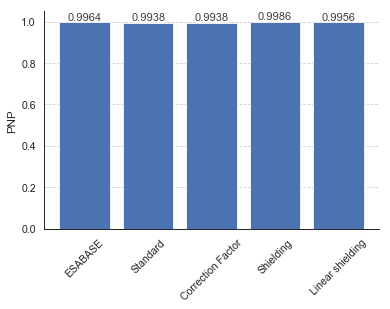

npc


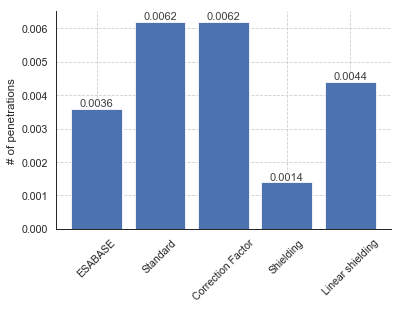

np_ni


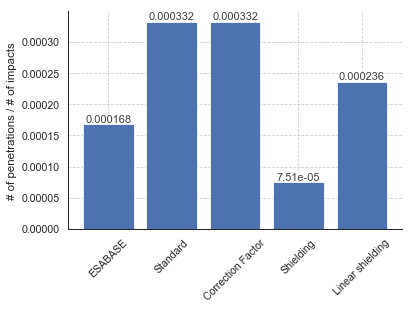

np_ni_ext


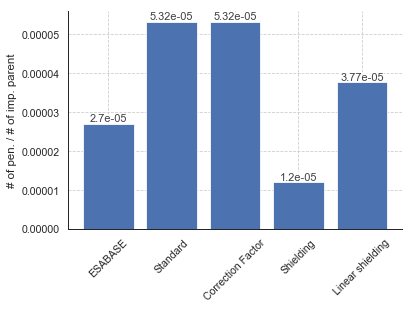

In [176]:
# plotting
barWidth = 0.8
r1 = [0, 1, 2, 3, 4]
gap = [3, 0.5, 1.5e-4, 0.03, 1.5e-4, 1e-5, 1.5e-6]
ylabels = ['# of impacts', '# of impacts', '# of penetrations', 'PNP', '# of penetrations',
           '# of penetrations / # of impacts', '# of pen. / # of imp. parent']

for j, l in enumerate(columns):
    print(l)
    f, ax = plt.subplots()
    b1 = ax.bar(labels, df2[l], width=barWidth)
    # Text below each barplot with a rotation at 45°
    plt.xticks([r for r in range(len(r1))], ['ESABASE', 'Standard', 'Correction Factor', 'Shielding', 'Linear shielding',], rotation=45)
    ax.set_ylabel(ylabels[j]) 
    # Text on the top of each barplot
    for i in range(len(r1)):
        height = b1[i].get_height()
        t = plt.text(b1[i].get_x() + b1[i].get_width()/2.0, height, s=df2[l][i], size=11, ha='center', va='bottom')
        t.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='none', pad=0))
    plt.savefig('_'.join(['test1', l, 'v2'])+'.pdf', bbox_inches='tight', dpi=330)
    # Show graphic
    plt.show()

## Comparison N. 2 

In [177]:
data = np.array([[5.70E-01, 1.19E+00, 7.83E-01, 2.08E-01, 5.28E-01],  # Np child_1 lead / Np child_2 lead
                 [3.475E-05, 8.726E-05, 7.841E-05, 1.296E-05, 5.303E-05]])  # Np (corrected) / Ni parent

In [178]:
columns=['np1_np2', 'np_ni_ext']
df1 = pd.DataFrame(data=data, columns=labels)
df2 = pd.DataFrame(data=data.T, columns=columns)

np1_np2


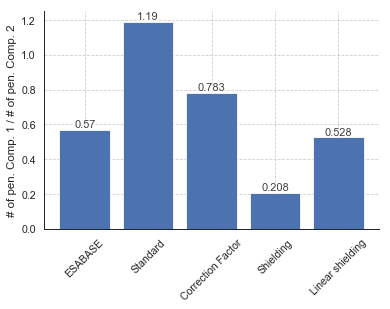

np_ni_ext


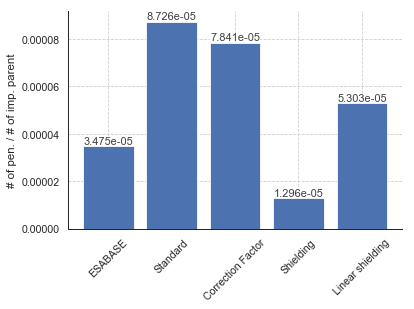

In [179]:
# plotting
barWidth = 0.8
r1 = [0, 1, 2, 3, 4]
gap = [0.03, 2.5e-6]
ylabels = ['# of pen. Comp. 1 / # of pen. Comp. 2', '# of pen. / # of imp. parent']

for j, l in enumerate(columns):
    print(l)
    f, ax = plt.subplots()
    b1 = ax.bar(labels, df2[l], width=barWidth)
    # Text below each barplot with a rotation at 45°
    plt.xticks([r for r in range(len(r1))], ['ESABASE', 'Standard', 'Correction Factor', 'Shielding', 'Linear shielding',], rotation=45)
    ax.set_ylabel(ylabels[j]) 
    # Text on the top of each barplot
    for i in range(len(r1)):
        height = b1[i].get_height()
        t = plt.text(b1[i].get_x() + b1[i].get_width()/2.0, height, s=df2[l][i], size=11, ha='center', va='bottom')
        t.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='none', pad=0))
    plt.savefig('_'.join(['test2', l, 'v2'])+'.pdf', bbox_inches='tight', dpi=330)
    # Show graphic
    plt.show()